# Практическая работа 8

## 1 Загрузить данные Market_Basket_Optimisation.csv

In [8]:
import pandas as pd
import os

PATH = '/Users/naverigin/PycharmProjects/MireaBigData/pr8/'
file1_path = os.path.join(PATH, 'Market_Basket_Optimisation.csv')
Market_Basket_Optimisation = pd.read_csv(file1_path)

## 2 Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров)

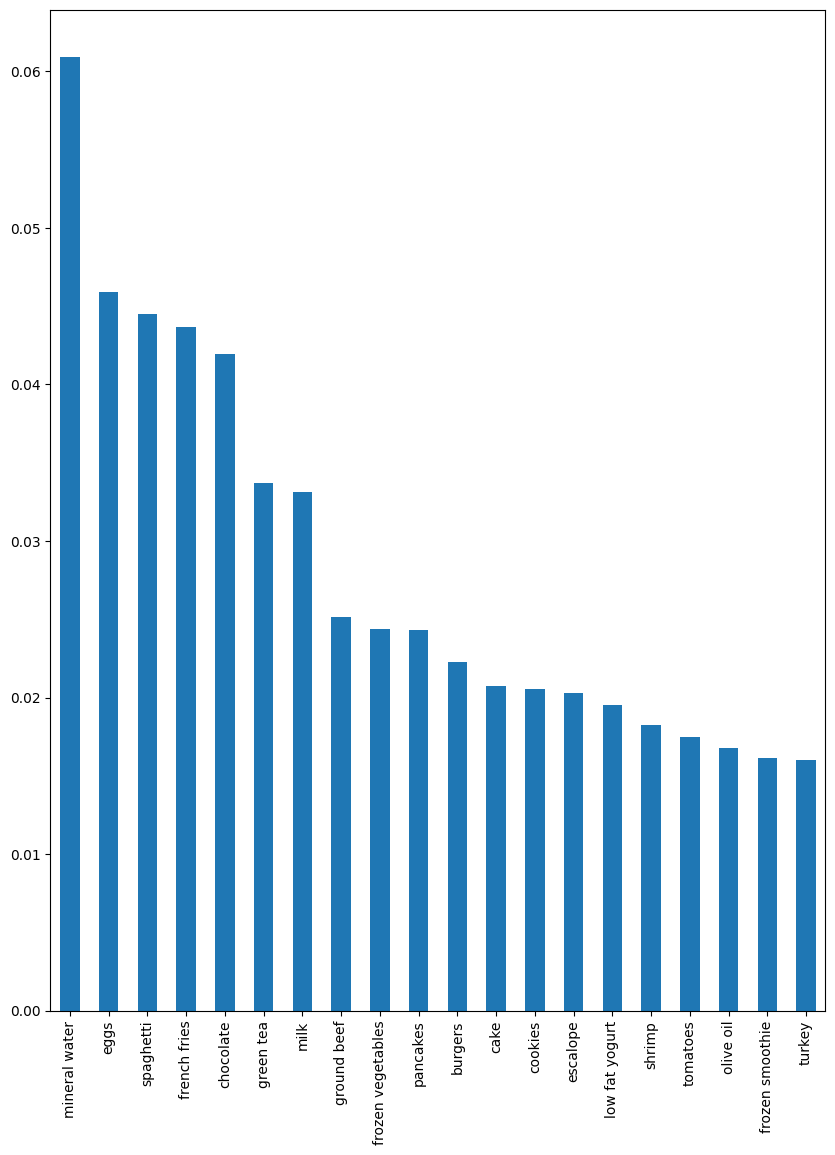

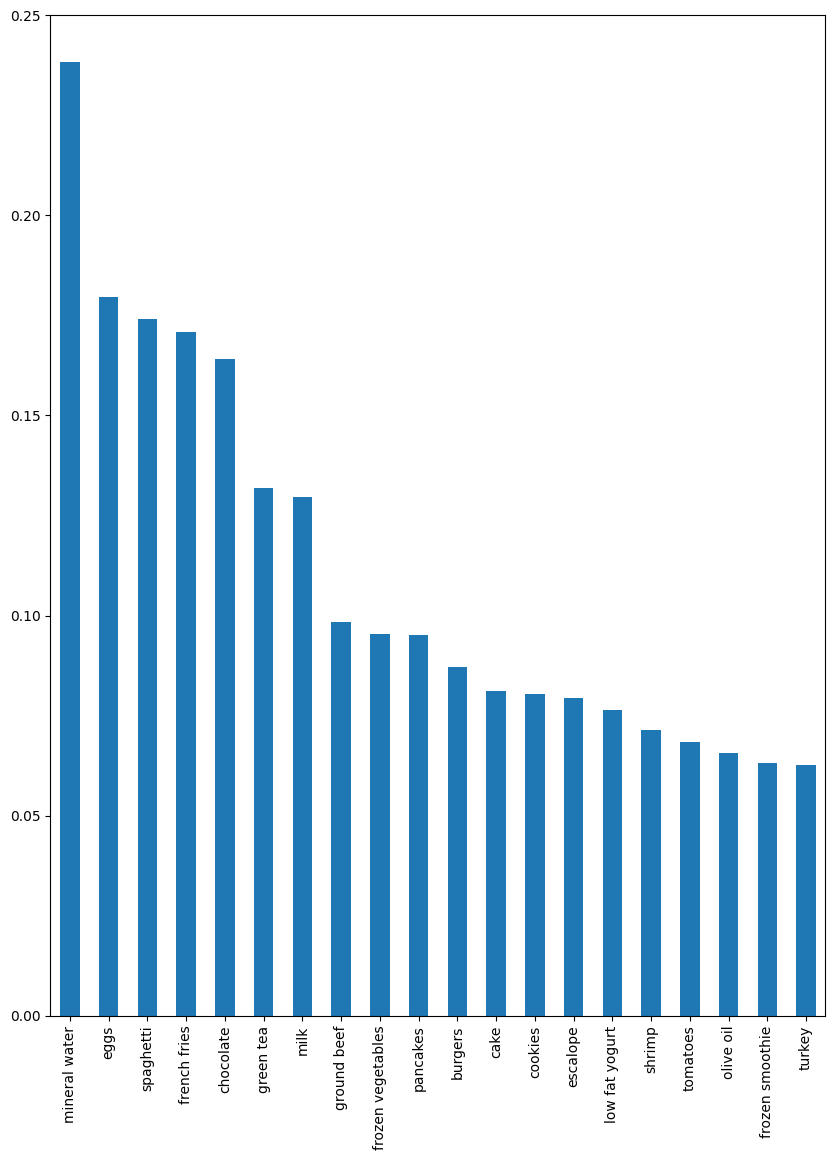

In [9]:
import matplotlib.pyplot as plt

# Относительная частота встречаемости товаров
plt.figure(figsize=(10, 13))
Market_Basket_Optimisation.stack().value_counts(normalize=True).sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

# Фактическая частота встречаемости товаров
plt.figure(figsize=(10, 13))
Market_Basket_Optimisation.stack().value_counts().apply(lambda i:i/Market_Basket_Optimisation.shape[0]).sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

## 3 Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил

In [10]:
import time
from apriori_python import apriori
from apyori import apriori as apyori
from efficient_apriori import apriori as eff_apriori

transactions = list()
for i in range(Market_Basket_Optimisation.shape[0]):
    row = Market_Basket_Optimisation.iloc[i].dropna().tolist()
    transactions.append(row)

methods = ['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth']
times = list()

def run_apriori(func, minSup, minConf):
    start = time.perf_counter()
    t, rules = func(transactions, minSup, minConf)
    times.append(time.perf_counter() - start)
    # print(f"Правил: {len(rules)}")
    # for r in rules:
    #     print(f"Правило: {r}")
    # print(f"Время выполнения: {t1} секунд")
    # print()

# apriori_python
print("apriori_python")
start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.04, minConf=0.17)
times.append(time.perf_counter() - start)
print(*rules, sep="\n")

# apyori
print("apyori")
start = time.perf_counter()
rules2 = apyori(transactions, min_support=0.04, min_confidence=0.17, min_lift=1.0001)  # apyori
results2 = list(rules2)
times.append(time.perf_counter() - start)
for res in results2:
    for sub in res[2]:
        print(sub[0], sub[1])
        print(f"Support: {res[1]}\nConfidence: {sub[2]}\nLift: {sub[3]}\n")

# efficient_apriori
print("efficient_apriori")
start = time.perf_counter()
items, rules3 = eff_apriori(transactions, min_support=0.039, min_confidence=0.17)
times.append(time.perf_counter() - start)

for i in range(len(rules3) - 1):
    print(f"{i + 1}. {rules3[i]}")

apriori_python
[{'mineral water'}, {'ground beef'}, 0.17179630665920537]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
apyori
frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667
Confidence: 0.32139951179820997
Lift: 1.3489067367020564

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05266666666666667
Confidence: 0.22104085058757697
Lift: 1.3489067367020564

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333
Confidence: 0.28338278931750743
Lift: 1.1893513821383916

frozenset({'mineral

## 4 Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил

In [11]:
from fpgrowth_py import fpgrowth

# fpgrowth
print('fpgrowth')
start = time.perf_counter()
items, rules4 = fpgrowth(transactions, minSupRatio=0.039, minConf=0.17)
times.append(time.perf_counter() - start)
for i in range(len(rules4) - 1):
    print(f"{i + 1}. {rules4[i]}")

fpgrowth
1. [{'spaghetti'}, {'ground beef'}, 0.225114854517611]
2. [{'ground beef'}, {'spaghetti'}, 0.3989145183175034]
3. [{'mineral water'}, {'ground beef'}, 0.17179630665920537]
4. [{'ground beef'}, {'mineral water'}, 0.41655359565807326]
5. [{'milk'}, {'mineral water'}, 0.37037037037037035]
6. [{'mineral water'}, {'milk'}, 0.20145495243424735]
7. [{'spaghetti'}, {'chocolate'}, 0.225114854517611]
8. [{'chocolate'}, {'spaghetti'}, 0.23921887713588283]
9. [{'chocolate'}, {'mineral water'}, 0.3213995117982099]
10. [{'mineral water'}, {'chocolate'}, 0.22104085058757694]
11. [{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
12. [{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
13. [{'eggs'}, {'mineral water'}, 0.28338278931750743]


## 5 Сравнить время выполнения всех алгоритмов и построить гистограмму

Время работы apriori_python: 0.32184712498565204 c
Время работы apyori: 0.006698541983496398 c
Время работы efficient_apriori: 0.006135000003268942 c
Время работы fpgrowth: 0.06909695800277404 c


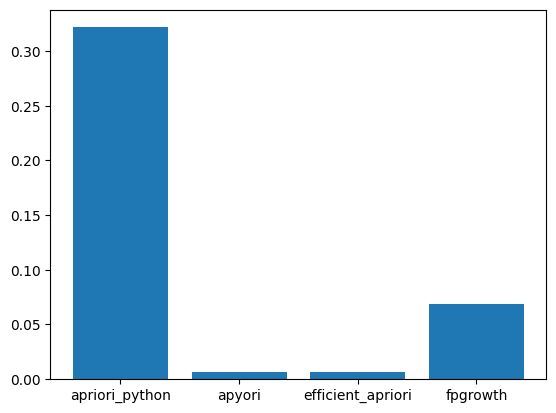

In [12]:
for i in range(0, 4):
    print(f'Время работы {methods[i]}: {times[i]} c')

plt.bar(methods, times, label="Сравнение скорости работы алгоритмов")
plt.show()

## 6 Загрузить данные data.csv

In [13]:
file2_path = os.path.join(PATH, 'data.csv')
data = pd.read_csv(file2_path)

## 7 Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров)

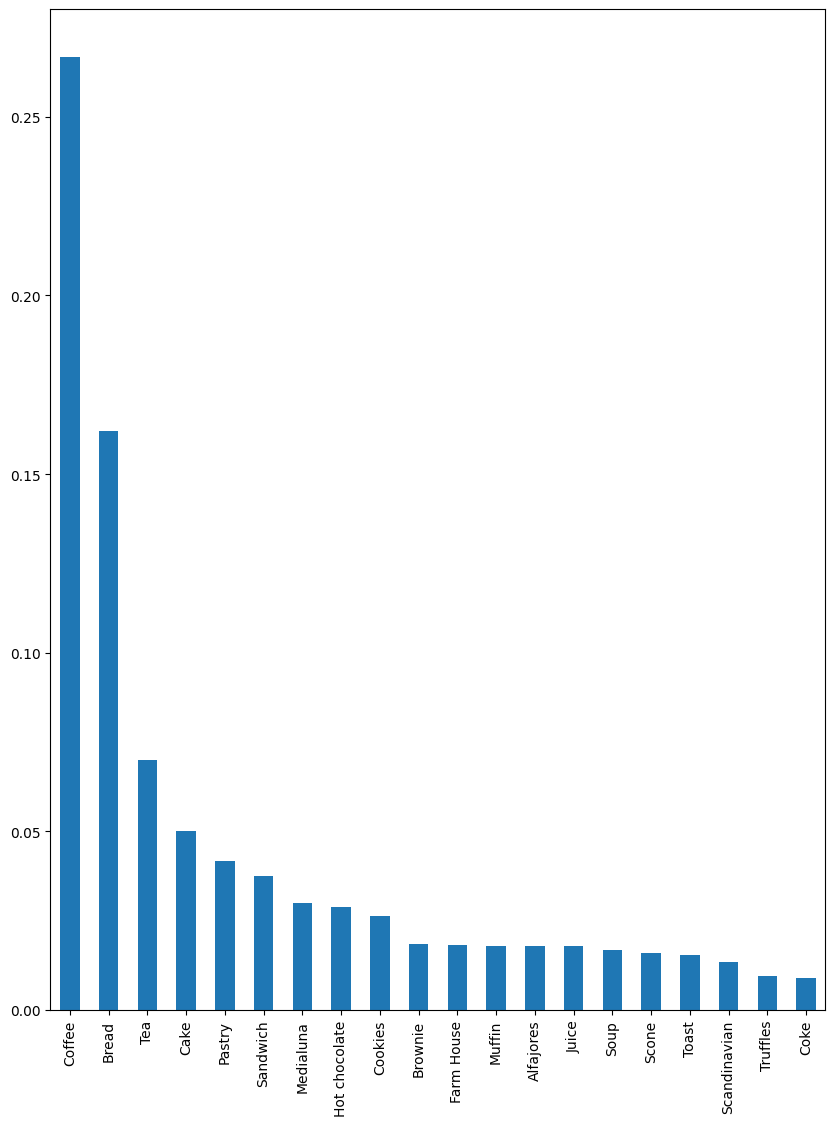

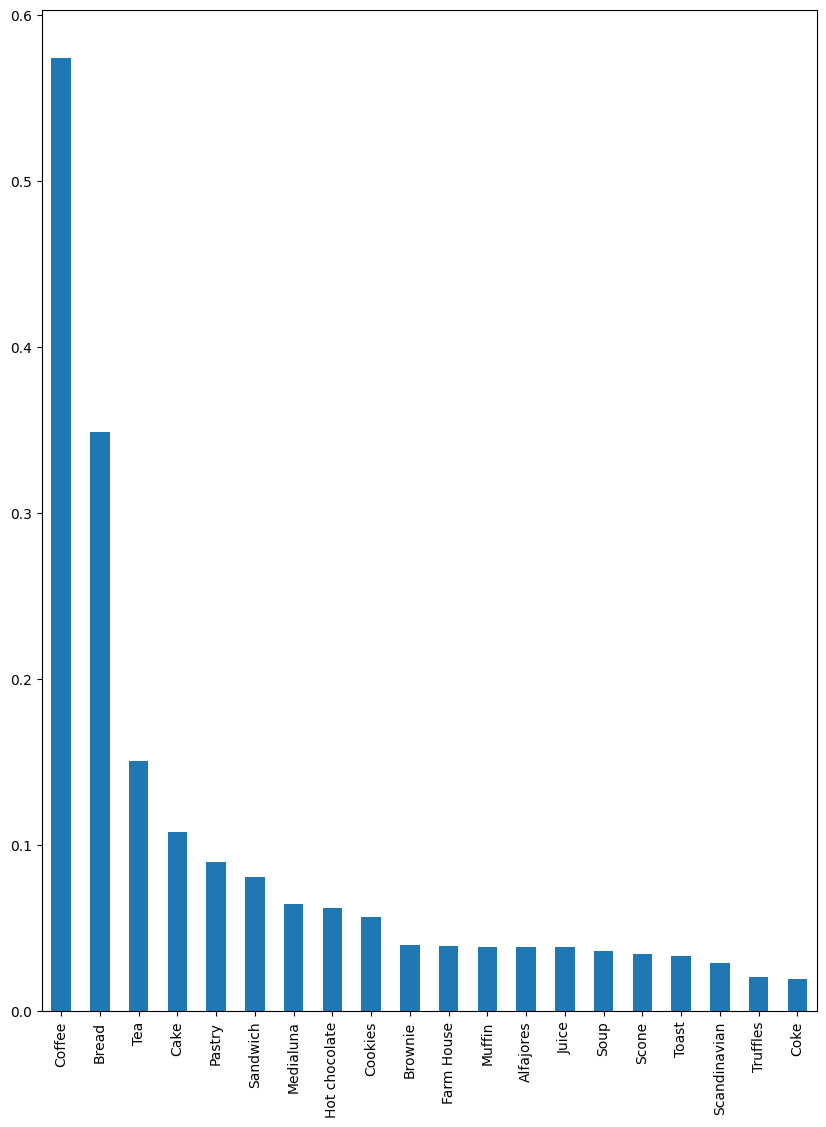

In [14]:
# Относительная частота встречаемости товаров
plt.figure(figsize=(10, 13))
data.stack().value_counts(normalize=True).sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

# Фактическая частота встречаемости товаров
plt.figure(figsize=(10, 13))
data.stack().value_counts().apply(lambda i:i/data.shape[0]).sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

## 8 Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил

In [15]:
transactions = list()
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

times = list()

# apriori_python
print("apriori_python")
start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.04, minConf=0.17)
times.append(time.perf_counter() - start)
print(*rules, sep="\n")

# apyori
print("apyori")
start = time.perf_counter()
rules2 = apyori(transactions, min_support=0.04, min_confidence=0.17, min_lift=1.0001)  # apyori
results2 = list(rules2)
times.append(time.perf_counter() - start)
for res in results2:
    for sub in res[2]:
        print(sub[0], sub[1])
        print(f"Support: {res[1]}\nConfidence: {sub[2]}\nLift: {sub[3]}\n")

# efficient_apriori
print("efficient_apriori")
start = time.perf_counter()
items, rules3 = eff_apriori(transactions, min_support=0.039, min_confidence=0.17)
times.append(time.perf_counter() - start)

for i in range(len(rules3) - 1):
    print(f"{i + 1}. {rules3[i]}")

apriori_python
[{'Coffee'}, {'Bread'}, 0.1881625441696113]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
apyori
frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785
Confidence: 0.5269582909460834
Lift: 1.109079618532724

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574
Confidence: 0.5521472392638037
Lift: 1.162094344121919

efficient_apriori
1. {Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
2. {Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
3. {Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
4. {Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)


## 9 Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил

In [16]:
# fpgrowth
print('fpgrowth')
start = time.perf_counter()
items, rules4 = fpgrowth(transactions, minSupRatio=0.039, minConf=0.17)
times.append(time.perf_counter() - start)
for i in range(len(rules4) - 1):
    print(f"{i + 1}. {rules4[i]}")

fpgrowth
1. [{'Cookies'}, {'Coffee'}, 0.5184466019417475]
2. [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
3. [{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
4. [{'Pastry'}, {'Coffee'}, 0.5521472392638037]
5. [{'Cake'}, {'Coffee'}, 0.5269582909460834]
6. [{'Tea'}, {'Coffee'}, 0.3496296296296296]
7. [{'Bread'}, {'Coffee'}, 0.2751937984496124]


## 10 Сравнить время выполнения всех алгоритмов и построить гистограмму

Время работы apriori_python: 0.0814609160006512 c
Время работы apyori: 0.002584791014669463 c
Время работы efficient_apriori: 0.002272083016578108 c
Время работы fpgrowth: 0.05984137501218356 c


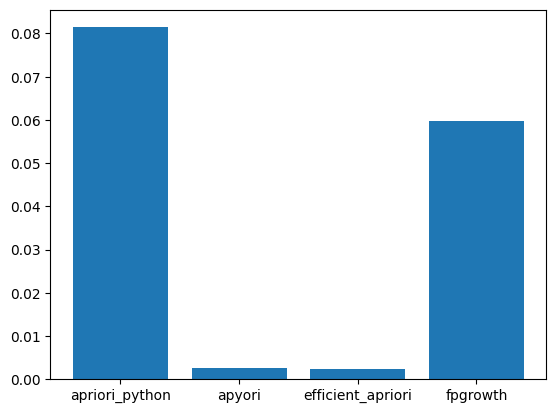

In [17]:
for i in range(0, 4):
    print(f'Время работы {methods[i]}: {times[i]} c')

plt.bar(methods, times, label="Сравнение скорости работы алгоритмов")
plt.show()